<h1> Smarter dimensionality reduction, followed by tsne and inverse PCA for 'whisk types' </h1>



In [1]:
import numpy as np
# import tables as tb
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
# import sklearn as sk
import seaborn as sns
from sklearn import manifold
from sklearn.decomposition import PCA
import random

# from lightning import Lightning
# lgn = Lightning(host="http://localhost:3000",ipython=True)
# lgn.create_session("tsne_scatter_line")
# lgn = Lightning(local=True,ipython=True)

ImportError: No module named numpy

In [6]:
theta = pd.read_csv('/Users/mathew/work/whiskfree/data/theta_34.csv',header=None)
kappa = pd.read_csv('/Users/mathew/work/whiskfree/data/kappa_34.csv',header=None)
tt = pd.read_csv('/Users/mathew/work/whiskfree/data/trialtype_34.csv',header=None)
ch = pd.read_csv('/Users/mathew/work/whiskfree/data/choice_34.csv',header=None)

In [86]:
decimate?

In [7]:
# reduce sampling frequency with decimate
from scipy.signal import decimate, resample

In [87]:
resample?

In [8]:
# theta_d = np.array([[decimate(theta.values.squeeze()[i,900:1890],10)] for i in xrange(0,theta.shape[0])])
theta_r = np.array([[resample(theta.values.squeeze()[i,900:1890],100)] for i in xrange(0,theta.shape[0])])

In [49]:
# plot original and decimated version
# theta_d = theta_d.squeeze()
theta_r = theta_r.squeeze()
theta_r.shape

(389, 100)

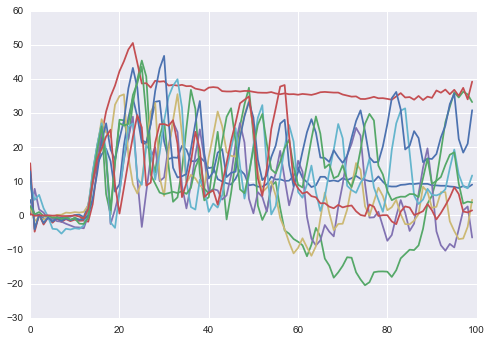

In [61]:
theta_dm = np.array([[theta_r[i] - np.mean(theta_r[i,0:10])] for i in xrange(0,theta_r.shape[0])])
theta_dm = theta_dm.squeeze()
_ = plt.plot(theta_dm[1:10,:].T)

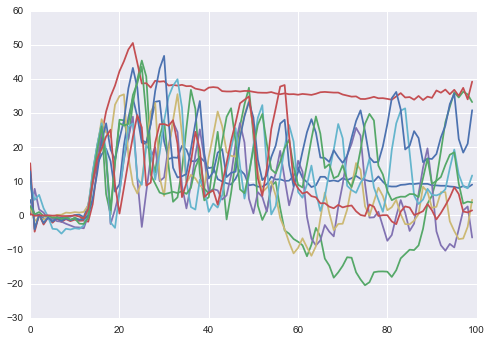

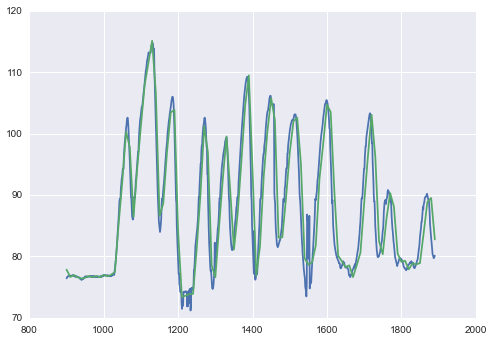

In [10]:
# import mpld3
# %matplotlib inline
# mpld3.enable_notebook()

plt.plot(np.linspace(900,1890,990),theta.values.squeeze()[10,900:1890])
plt.plot(np.linspace(900,1890,100),theta_r[10])
# mpld3.show()

In [104]:
x = np.linspace(900,1890,990)
x.max()

1890.0

In [105]:
theta_r.shape

(389, 99)

In [74]:
x = theta.values.squeeze()[10,900:1890]
x.shape

(990,)

In [81]:
y = decimate(x,10)
y.shape

(99,)

In [89]:
z = resample(x,99)
z.shape

(99,)

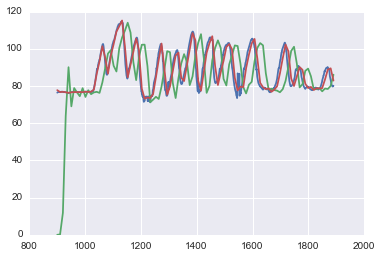

In [90]:
plt.plot(np.linspace(900,1890,990),x)
plt.plot(np.linspace(900,1890,99),y)
plt.plot(np.linspace(900,1890,99),z)

In [121]:
# ch = pd.read_csv('/Users/mathew/work/whiskfree/data/choice_34.csv',header=None)

In [91]:
Xpca_theta = PCA(n_components=30).fit_transform(theta_r)

In [70]:

PCA.fit_transform?
theta_dm.shape

(389, 100)

In [71]:
Xpca_theta.shape
y = np.nan_to_num(tt.values.squeeze())

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 389 / 389
[t-SNE] Mean sigma: 18.716389
[t-SNE] Error after 100 iterations with early exaggeration: 17.636001
[t-SNE] Error after 225 iterations: 1.672239


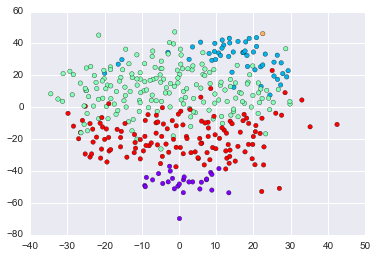

In [93]:
tsne = manifold.TSNE(n_components=2,learning_rate=1000,min_grad_norm=1e-8,method='exact',verbose=1,random_state=0)
mappedX_theta = tsne.fit_transform(Xpca_theta)
# mappedX_kappa = tsne.fit_transform(Xpca_kappa)
plt.scatter(mappedX_theta[:,0],mappedX_theta[:,1],c=Y_hat.labels_,cmap='rainbow')

In [37]:
# mappedX_theta.shape
# manifold.__file__
manifold.TSNE?

In [39]:
from sklearn.cluster import KMeans

In [92]:
kmeans = KMeans(5, random_state=8)
Y_hat = kmeans.fit(Xpca_theta)

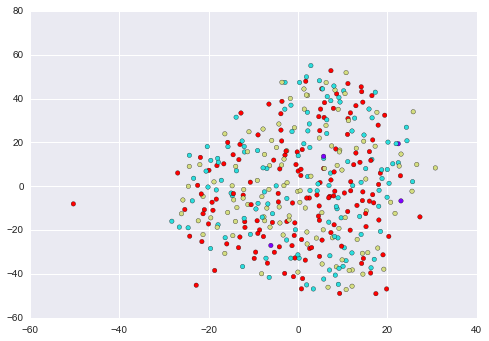

In [72]:
plt.scatter(mappedX_theta[:,0],mappedX_theta[:,1],c=y,cmap='rainbow')

In [114]:
ch = ch.squeeze()
ch.shape

(389,)

In [120]:
# lgn.scatter(mappedX_theta[:,0],mappedX_theta[:,1],group= ch,size = 3,colormap='Dark2')

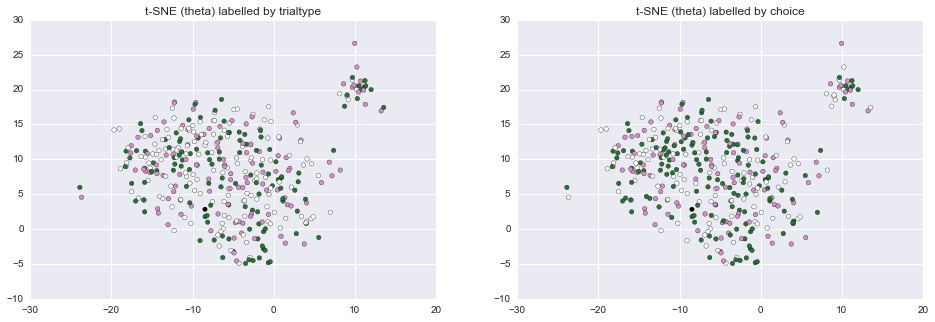

In [123]:
fig, ax = plt.subplots(1,2,figsize = (16,5))
ax[0].scatter(mappedX_theta[:,0],mappedX_theta[:,1],c=tt.values,cmap='cubehelix')
ax[0].set_title('t-SNE (theta) labelled by trialtype')
ax[1].scatter(mappedX_theta[:,0],mappedX_theta[:,1],c=ch.values,cmap='cubehelix')
ax[1].set_title('t-SNE (theta) labelled by choice')
# plt.savefig('theta_34_tsne.png')

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (16,5))
ax[0].scatter(mappedX_kappa[:,0],mappedX_kappa[:,1],c=tt.values,cmap='cubehelix')
ax[0].set_title('t-SNE (kappa) labelled by trialtype')
ax[1].scatter(mappedX_kappa[:,0],mappedX_kappa[:,1],c=ch.values,cmap='cubehelix')
ax[1].set_title('t-SNE (kappa) labelled by choice')
plt.savefig('kappa_34_tsne.png')

In [ ]:
x = theta.values.squeeze()
theta.shape


In [145]:
PCA?

In [181]:
pca_theta = PCA(n_components=0.8)
pca_theta.fit?

In [217]:
theta_reduced = pca_theta.fit(theta_r)
# pca_theta.inverse_transform?
theta_reduced.components_.shape

(13, 100)

In [219]:
np.std(theta_reduced.components_[i])

0.099999968392379096

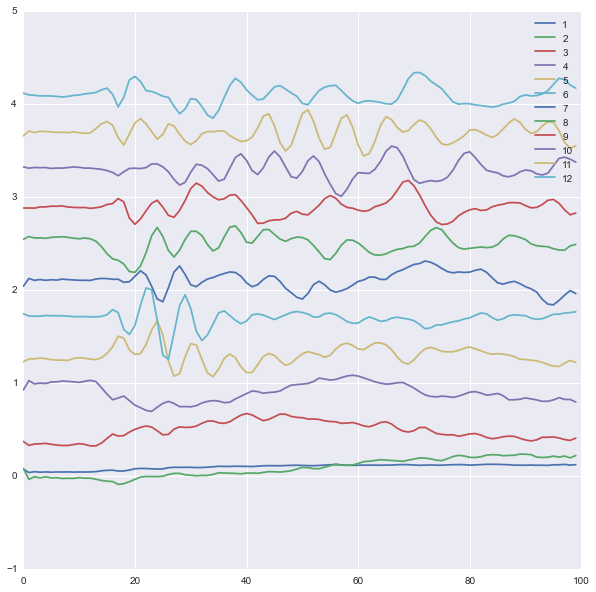

In [228]:
# theta_reduced.
plt.subplots(figsize=(10,10))
offset = 0.0;
for i in xrange(0,12):
    _ =plt.plot(offset + theta_reduced.components_[i])
    offset = offset + 4*np.std(theta_reduced.components_[i])
    
plt.legend(xrange(1,13))

<matplotlib.colorbar.Colorbar instance at 0x1224cef38>

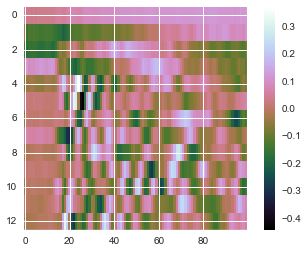

In [214]:
x = theta_reduced.components_
# x.shape
# plt.imshow?
plt.imshow(x,aspect = float(x.shape[1])/x.shape[0],interpolation = 'none',cmap='cubehelix')
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x120264cb0>

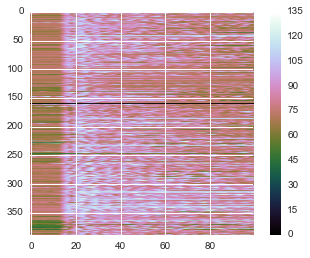

In [215]:
tax = plt.imshow(theta_r,cmap='cubehelix',aspect = float(theta_r.shape[1])/theta_r.shape[0])
plt.colorbar()


In [103]:
# plot kmeans cluster centers
# Y_hat.cluster_centers_.shape
# Xpca_theta = PCA(n_components=30).fit_transform(theta_dm)

pca = PCA(n_components=30).fit(theta_r)

theta_pca = pca.transform(theta_r)
# theta_pca.shape

kmeans = KMeans(9, random_state=8)
Y_hat = kmeans.fit(theta_pca)

reconstructed_centers = pca.inverse_transform(Y_hat.cluster_centers_)

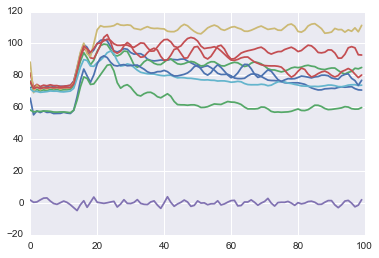

In [104]:
reconstructed_centers.shape
_ = plt.plot(reconstructed_centers.T)

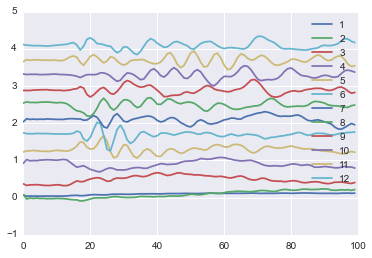

In [105]:
# _ = plt.plot(pca.components_.T)
offset = 0.0;
for i in xrange(0,12):
    _ = plt.plot(offset + pca.components_[i])
    offset = offset + 4*np.std(pca.components_[i])
    
plt.legend(xrange(1,13))

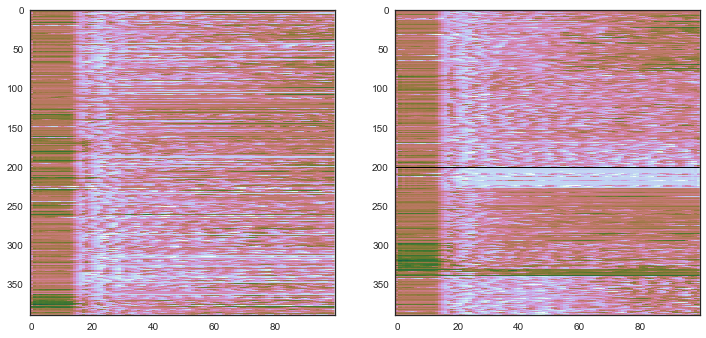

In [145]:
# reorder theta into clusters.
with sns.axes_style("white"):
    fig, ax = plt.subplots(1,2,figsize = (12,6))
ax[0].imshow(theta_r,aspect = float(theta_r.shape[1])/theta_r.shape[0],cmap = 'cubehelix',interpolation = 'none')
ax[1].imshow(theta_r[np.argsort(Y_hat.labels_)],aspect = float(theta_r.shape[1])/theta_r.shape[0],cmap = 'cubehelix',interpolation = 'none')

In [146]:
# np.argsort(Y_hat.labels_)
# dist = np.linalg.norm(a-b)

TypeError: unbound method gallery() must be called with Lightning instance as first argument (got nothing instead)

<h2> Watching t-sne in action </h2>
<h4> using code from https://www.oreilly.com/learning/an-illustrated-introduction-to-the-t-sne-algorithm </h4>

In [4]:
from numpy import linalg
from numpy.linalg import norm
import sklearn
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne import (_joint_probabilities,
                                    _kl_divergence)
from sklearn.utils.extmath import _ravel
from sklearn.manifold import TSNE

In [8]:
positions = []
def _gradient_descent(objective, p0, it, n_iter, objective_error=None,
                      n_iter_check=1, n_iter_without_progress=50,
                      momentum=0.5, learning_rate=1000.0, min_gain=0.01,
                      min_grad_norm=1e-7, min_error_diff=1e-7, verbose=0,
                      args=None, kwargs=None):

    p = p0.copy().ravel()
    update = np.zeros_like(p)
    gains = np.ones_like(p)
    error = np.finfo(np.float).max
    best_error = np.finfo(np.float).max
    best_iter = 0

    for i in range(it, n_iter):
        positions.append(p.copy())
        
        new_error, grad = objective(p, *args, **kwargs)
        grad_norm = linalg.norm(grad)

        inc = update * grad >= 0.0
        dec = np.invert(inc)
        gains[inc] += 0.05
        gains[dec] *= 0.95
        np.clip(gains, min_gain, np.inf)
        grad *= gains
        update = momentum * update - learning_rate * grad
        p += update

        if (i + 1) % n_iter_check == 0:
            if new_error is None:
                new_error = objective_error(p, *args)
            error_diff = np.abs(new_error - error)
            error = new_error

            if verbose >= 2:
                m = "[t-SNE] Iteration %d: error = %.7f, gradient norm = %.7f"
                print(m % (i + 1, error, grad_norm))

            if error < best_error:
                best_error = error
                best_iter = i
            elif i - best_iter > n_iter_without_progress:
                if verbose >= 2:
                    print("[t-SNE] Iteration %d: did not make any progress "
                          "during the last %d episodes. Finished."
                          % (i + 1, n_iter_without_progress))
                break
            if grad_norm <= min_grad_norm:
                if verbose >= 2:
                    print("[t-SNE] Iteration %d: gradient norm %f. Finished."
                          % (i + 1, grad_norm))
                break
            if error_diff <= min_error_diff:
                if verbose >= 2:
                    m = "[t-SNE] Iteration %d: error difference %f. Finished."
                    print(m % (i + 1, error_diff))
                break

        if new_error is not None:
            error = new_error

    return p, error, i

sklearn.manifold.t_sne._gradient_descent = _gradient_descent

In [5]:
# from sklearn import manifold
# RS = 20150101
# tsne = manifold.TSNE(n_components=2,learning_rate=500,verbose=1,random_state=0)
X_proj = TSNE().fit_transform(Xpca_theta)

NameError: name 'Xpca_theta' is not defined

In [12]:
X_iter = np.dstack(position.reshape(-1, 2)
                   for position in positions)

In [25]:
sklearn.__version__

'0.17'

In [18]:
y = tt.values
y = np.nan_to_num(y)
# y(y<0) = 0
# y = y + 1e-14
y.shape

(389, 1)

In [44]:
! pip install moviepy

    100% |████████████████████████████████| 110kB 682kB/s 
    100% |████████████████████████████████| 4.8MB 64kB/s 
  Running setup.py bdist_wheel for moviepy ... - \ | done
  Stored in directory: /Users/mathew/Library/Caches/pip/wheels/ba/fa/af/be4051961aa23c8566906e9a3bd5f7bb57ac2c3f3c43f09dbc
Successfully built moviepy
You are using pip version 8.0.2, however version 8.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import moviepy as mpy

ImportError: No module named moviepy

In [21]:
X_iter.shape

(389, 2, 175)

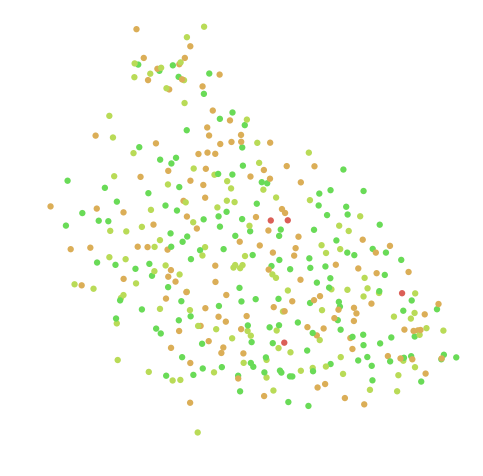

In [24]:
# from moviepy.video.io.bindings import mplfig_to_npimage
# import moviepy.editor as mpy
f, ax, sc, txts = scatter(X_iter[...,-1],y.squeeze())

# def make_frame_mpl(t):
#     i = int(t*40)
#     x = X_iter[..., i]
#     sc.set_offsets(x)
#     for j, txt in zip(range(10), txts):
#         xtext, ytext = np.median(x[y == j, :], axis=0)
#         txt.set_x(xtext)
#         txt.set_y(ytext)
#     return mplfig_to_npimage(f)

# animation = mpy.VideoClip(make_frame_mpl,
#                           duration=X_iter.shape[2]/40.)
# animation.write_gif("tsne_1.gif", fps=20)

In [16]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
#     for i in range(10):
#         # Position of each label.
#         xtext, ytext = np.median(x[colors == i, :], axis=0)
#         txt = ax.text(xtext, ytext, str(i), fontsize=24)
#         txt.set_path_effects([
#             PathEffects.Stroke(linewidth=5, foreground="w"),
#             PathEffects.Normal()])
#         txts.append(txt)

    return f, ax, sc, txts

In [ ]:
c = ch.values.squeeze()==3
tt1 = theta.values.squeeze()[c,499:2499]
tt1.shape[0]

In [ ]:
float(tt1.shape[0]) /tt1.shape[1]

In [ ]:
iris = sns.load_dataset('iris')

In [ ]:
plt.plot?

In [ ]:
lgn.line(tt1,color=[0,0,0],"alpha" = 0.01)

In [ ]:
lgn.scatter?

<h3> MPLD3 linked plot attempt </h3>

In [73]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import mpld3
from mpld3 import plugins, utils



class LinkedView(plugins.PluginBase):
    """A simple plugin showing how multiple axes can be linked"""

    JAVASCRIPT = """
    mpld3.register_plugin("linkedview", LinkedViewPlugin);
    LinkedViewPlugin.prototype = Object.create(mpld3.Plugin.prototype);
    LinkedViewPlugin.prototype.constructor = LinkedViewPlugin;
    LinkedViewPlugin.prototype.requiredProps = ["idpts", "idline", "data"];
    LinkedViewPlugin.prototype.defaultProps = {}
    function LinkedViewPlugin(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    LinkedViewPlugin.prototype.draw = function(){
      var pts = mpld3.get_element(this.props.idpts);
      var line = mpld3.get_element(this.props.idline);
      var data = this.props.data;

      function mouseover(d, i){
        line.data = data[i];
        line.elements().transition()
            .attr("d", line.datafunc(line.data))
            .style("stroke", this.style.fill);
      }
      pts.elements().on("mouseover", mouseover);
    };
    """

    def __init__(self, points, line, linedata):
        if isinstance(points, matplotlib.lines.Line2D):
            suffix = "pts"
        else:
            suffix = None

        self.dict_ = {"type": "linkedview",
                      "idpts": utils.get_id(points, suffix),
                      "idline": utils.get_id(line),
                      "data": linedata}

In [108]:
Xpca_theta.shape

(389, 30)

In [ ]:
theta_r = np.array([[resample(theta.values.squeeze()[i,900:1890],100)] for i in xrange(0,theta.shape[0])])
theta_r = theta_r.squeeze()
theta_dm = np.array([[theta_r[i] - np.mean(theta_r[i,0:10])] for i in xrange(0,theta_r.shape[0])])
theta_dm = theta_dm.squeeze()

Xpca_theta = PCA(n_components=30).fit_transform(theta_dm)

tsne = manifold.TSNE(n_components=2,learning_rate=500,verbose=1,random_state=0)
mappedX_theta = tsne.fit_transform(Xpca_theta)

kmeans = KMeans(5, random_state=8)
Y_hat = kmeans.fit(Xpca_theta)

In [114]:
subset = random.sample(theta.index, theta.shape[0])
# x = np.linspace(500, 2499, 2000)
x = np.linspace(900,1890,100)
# data = np.array([[x,theta.values.squeeze()[si,499:2499]] for si in subset]) # data needs to be N by 2 x time (for x and y axes)
data = np.array([[x,theta_dm[si]] for si in subset]) # data needs to be N by 2 x time (for x and y axes)


fig, ax = plt.subplots(1,2,figsize = (10,10))

ax[0] = plt.subplot2grid((3,3), (0, 0), colspan=3)
ax[1] = plt.subplot2grid((3,3), (1, 0), colspan=3,rowspan=2)


# points = ax[1].scatter(mappedX_theta[subset,0],mappedX_theta[subset,1],s = 100,c=Y_hat.labels_[subset],alpha=0.5,cmap='rainbow')
points = ax[1].scatter(Xpca_theta[subset,0],Xpca_theta[subset,1],s = 100,c=Y_hat.labels_[subset],alpha=0.5,cmap='rainbow')

ax[1].set_xlabel('t-sne dim 1')
ax[1].set_ylabel('t-sne dim 2')



# create the line object
lines = ax[0].plot(x, 0 * x, '-w', lw=3, alpha=0.5)
# ax[0].set_ylim(-6e-3, 6e-3)
ax[0].set_ylim(-10,70)

ax[0].set_title("Mouse 36")

# transpose line data and add plugin
linedata = data.transpose(0, 2, 1).tolist()
plugins.connect(fig, LinkedView(points, lines[0], linedata))

mpld3.display()

In [ ]:
import random
r = random.sample(kappa.index, 10)

In [ ]:
subset = random.sample(kappa.index, 100)
x = np.linspace(500, 2499, 2000)
data = np.array([[x,theta.values.squeeze()[si,499:2499]] for si in subset]) # data needs to be N by 2 x time (for x and y axes)
data.shape

In [ ]:
kappa.shape

In [ ]:
x = np.linspace(0, 10, 100)
P.shape

In [ ]:
data_ = np.array([[x, Ai * np.sin(x / Pi)]
                 for (Ai, Pi) in zip(A, P)])

# data[0]
data_.shape

In [ ]:
# plt.plot(data.transpose(0, 2, 1)[1])
plt.plot(data[3,0],data[3,1])

In [ ]:

linedata = data.transpose(0, 2, 1)#.tolist()
linedata.shape

In [ ]:
mappedX_kappa[subset,0].shape

In [ ]:
x = np.linspace(500, 2499, 2000)

data = kappa.values.squeeze()[subset,499:2499]
data.shape

In [ ]:
x = np.linspace(500, 2499, 2000)
x.shape

In [ ]:
data = np.array([[x,kappa.values.squeeze()[si,499:2499]] for si in subset])

In [ ]:
# subset
# zip(A,P)
data.shape

In [ ]:
fig, ax = plt.subplots(2)

# scatter periods and amplitudes
np.random.seed(0)
P = np.random.random(size=10)
A = np.random.random(size=10)
x = np.linspace(0, 10, 100)
data = np.array([[x, Ai * np.sin(x / Pi)]
                 for (Ai, Pi) in zip(A, P)])
points = ax[1].scatter(P, A, c=P + A,
                       s=200, alpha=0.5)
ax[1].set_xlabel('Period')
ax[1].set_ylabel('Amplitude')

# create the line object
lines = ax[0].plot(x, 0 * x, '-w', lw=3, alpha=0.5)
ax[0].set_ylim(-1, 1)

# transpose line data and add plugin
linedata = data.transpose(0, 2, 1).tolist()
fig.plugins = [LinkedView(points, lines[0], linedata)]

